In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import text

In [103]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

In [104]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [105]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [106]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [108]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [109]:
# get column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [110]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measure.date)).scalar()
print(recent_date)


2017-08-23


In [111]:
# Find the most recent date in the data set.
recent_date = engine.execute(text('SELECT MAX(date) FROM measurement')).fetchall()
recent_date

[('2017-08-23',)]

In [113]:
# Starting from the most recent data point in the database.
recent_date
# Calculate the date one year from the last date in data set.
prev_yr = '2016-08-23'
# Perform a query to retrieve the date and precipitation scores
yr1_data_prec = engine.execute(text("""SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY date DESC"""))
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
yr1_data_df = pd.DataFrame(yr1_data_prec)
yr1_data_df.columns = ['Date','Precipitation']
yr1_data_df.head()



,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


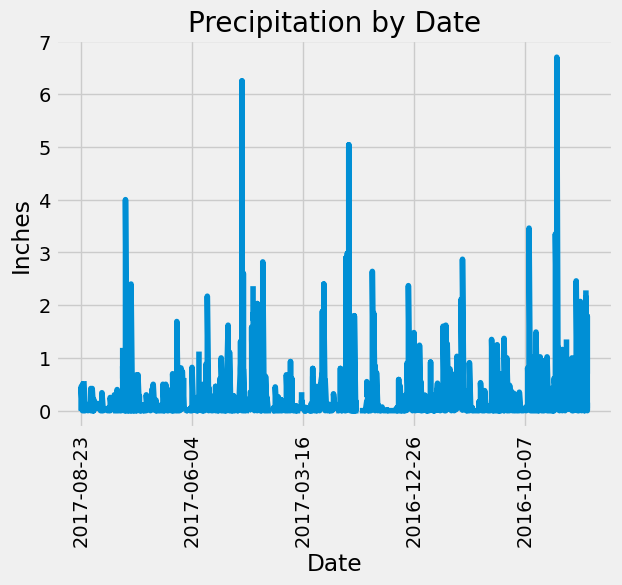

In [123]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(yr1_data_df['Date'], yr1_data_df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation by Date')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

Text(0, 0.5, 'Inches')

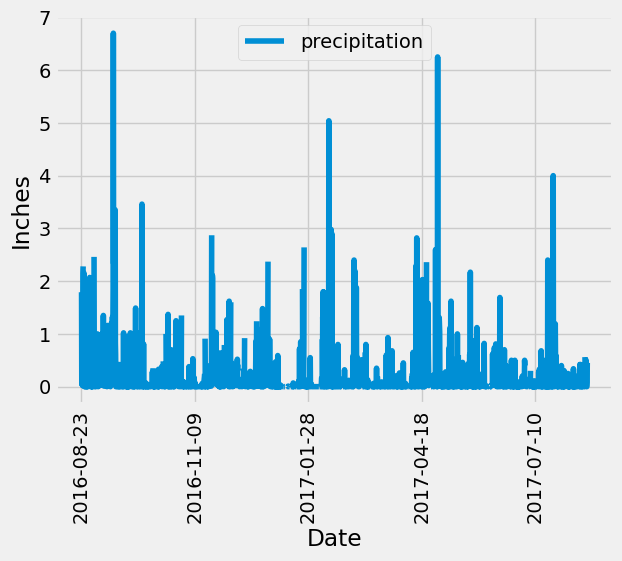

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [132]:
# Use Pandas to calculate the summary statistics for the precipitation data
yr1_summary = yr1_data_df['Precipitation'].describe().to_frame()
yr1_summary.columns = ['Precipitation']
yr1_summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

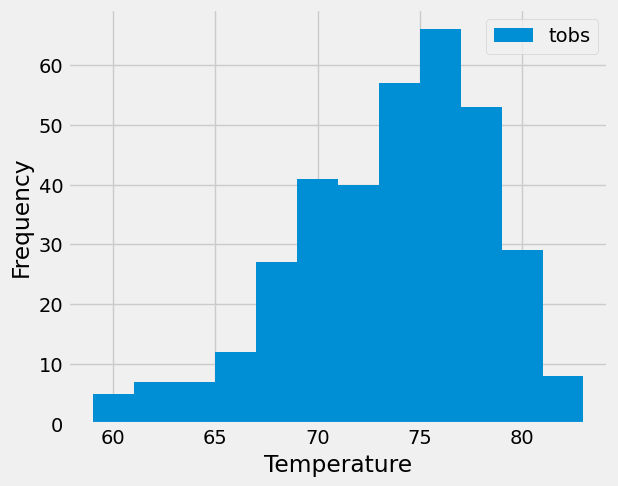

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()